In [2]:
!pip install scipy numpy matplotlib

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.8 kB 393.8 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 459.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/38.7 MB ? eta -:--:--
   ---------------------------------------- 0.2/38.7 MB 5.8 MB/s eta 0:00:07
    --------------------------------------- 0.5/38.7 MB 6.6 MB/s eta 0:00:06
    --------------------------------------- 0.9/38.7 MB 6.6 MB/s eta 0:00:06
   - -------------------------------------- 1.4/38.7 MB 7.4 MB/s eta 0:00:06
   -- ------------------------------------- 1.9/38.7 MB 8.2 MB/s eta 0:00:05
   -- ------------------------------------- 2.6/38.7 MB 9.0 MB/s eta 0:00:04
   --- ------------------------------------ 3.3/38.7 MB 10.1 MB/s eta 0:00:04
   ---- ----------------------------------- 4.1/38.7 MB 11.0 MB/s eta 0:00:04
   ----


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\nathanjorge\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import os

(-4.0, 4.0)

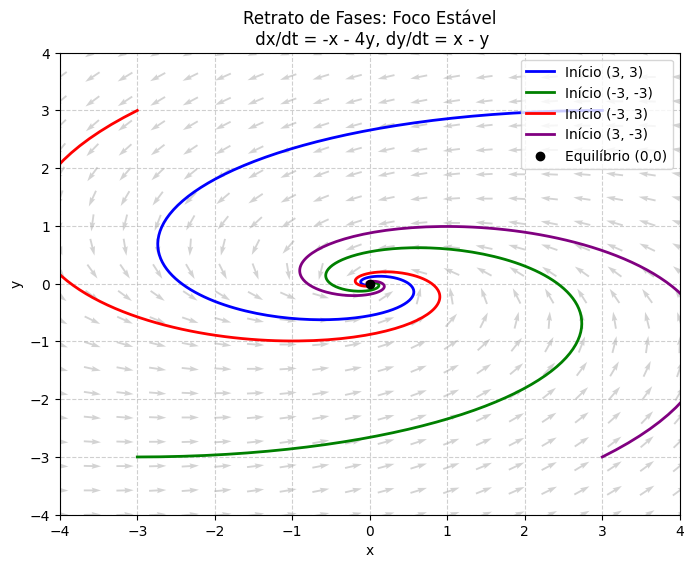

In [9]:
# 1. Definindo o sistema de equações diferenciais
# x' = -x - 4y
# y' = x - y
def sistema(z, t):
    x, y = z
    dxdt = -x - 4*y
    dydt = x - y
    return [dxdt, dydt]

# Configuração da figura
edo = plt.figure(figsize=(8, 6))

# 2. Gerando o Campo Vetorial (as setinhas de fundo)
x = np.linspace(-4, 4, 20)
y = np.linspace(-4, 4, 20)
X, Y = np.meshgrid(x, y)

# Calculando as derivadas em cada ponto da grade
DX = -X - 4*Y
DY = X - Y

# Normalizando para as setas terem tamanho uniforme (melhora a visualização)
M = np.hypot(DX, DY)
M[M == 0] = 1 # Evitar divisão por zero
DX /= M
DY /= M
plt.quiver(X, Y, DX, DY, color='lightgray', pivot='mid')

# 3. Calculando algumas Trajetórias (linhas coloridas)
# Tempo de simulação
t = np.linspace(0, 10, 500)
# Condições iniciais (pontos de onde as linhas partem)
pontos_iniciais = [(3, 3), (-3, -3), (-3, 3), (3, -3)]
cores = ['blue', 'green', 'red', 'purple']

for ponto, cor in zip(pontos_iniciais, cores):
    solucao = odeint(sistema, ponto, t)
    plt.plot(solucao[:, 0], solucao[:, 1], color=cor, linewidth=2, label=f'Início {ponto}')

# Marcando o ponto de equilíbrio
plt.plot(0, 0, 'ko', label='Equilíbrio (0,0)')

# Detalhes do gráfico
plt.title("Retrato de Fases: Foco Estável\n dx/dt = -x - 4y, dy/dt = x - y")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(-4, 4)
plt.ylim(-4, 4)



In [6]:
# Mostrando o gráfico
plt.show()

In [15]:
# Caminho da pasta e nome do arquivo
pasta = r"C:\Users\nathanjorge\Desktop\Nova_pasta"
nome_arquivo = "edo.png"

# Combina a pasta com o nome do arquivo de forma segura
caminho_completo = os.path.join(pasta, nome_arquivo)

In [16]:
# Salva o gráfico contido na variável EDO
edo.savefig(caminho_completo, dpi=300) # dpi=300 garante alta qualidade